In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('D:/学习/集思项目/final project/train.csv')
X = pd.read_csv(r'D:/学习/集思项目/final project/tfidf2.csv',header = None)

In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,34634,34635,34636,34637,34638,34639,34640,34641,34642,34643
0,4.482953,30.570149,18.022587,6.971426,5.800844,8.37292,4.12232,2.206366,12.935958,2.680922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,2.206366,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = np.array(X)
Y = data[['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']]
Y = Y.head(10000)
Y = np.array(Y)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [6]:
X_sum = np.row_stack((X_train, X_test))
Y_sum = np.row_stack((y_train, y_test))

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

X_sparse = sparse.csr_matrix(X_sum)

In [8]:
X_sparse

<10000x34644 sparse matrix of type '<class 'numpy.float64'>'
	with 686140 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.metrics import euclidean_distances

distances = euclidean_distances(X_sparse)

In [10]:
distances

array([[  0.        , 118.28116224,  89.70190316, ...,  79.14574848,
         66.0517382 ,  70.27834862],
       [118.28116224,   0.        , 131.3222554 , ..., 124.1908234 ,
        116.25232633, 119.79177313],
       [ 89.70190316, 131.3222554 ,   0.        , ...,  97.18367799,
         86.63758216,  91.55305921],
       ...,
       [ 79.14574848, 124.1908234 ,  97.18367799, ...,   0.        ,
         75.53571337,  81.12923209],
       [ 66.0517382 , 116.25232633,  86.63758216, ...,  75.53571337,
          0.        ,  68.08359305],
       [ 70.27834862, 119.79177313,  91.55305921, ...,  81.12923209,
         68.08359305,   0.        ]])

In [11]:
def fit_ML_KNN(k, X, Y, distances):
    
    s = 1
    m = len(X)
    P1 = np.zeros((6,))
    Pe1 = np.zeros((6, k + 1))
    P0 = np.zeros((6,))
    Pe0 = np.zeros((6, k + 1))
    ind = np.argsort(distances)
    
    for i in range(6):
        y = 0
        for j in range(m):
            if Y[j][i] == 1:
                y = y + 1
        P1[i] = (s + y) / (s * 2 + m)
        P0[i] = 1 - P1[i]
    
    for i in range(6):
        c1 = np.zeros(k + 1)
        c0 = np.zeros(k + 1)
        for j in range(m):
            temp = 0
            for kk in range(1,k + 1):
                if Y[ind[j][kk]][i] == 1:
                    temp = temp + 1
            if Y[j][i] == 1:
                c1[temp] = c1[temp] + 1
            else:
                c0[temp] = c0[temp] + 1
        
        for l in range(k + 1):
            Pe1[i][l] = (s + c1[l]) / (s * (k + 1) + c1.sum())
            Pe0[i][l] = (s + c0[l]) / (s * (k + 1) + c0.sum())
            
    return P1, P0, Pe1, Pe0

In [12]:
def predict_IML_KNN(k, P1, P0, Pe1, Pe0, test_Data, Y, distances):
    
    rtl = np.zeros((test_Data.shape[0], 6))
    m = test_Data.shape[0]
    predict_labels = np.zeros((m, 6))
    ind = np.argsort(distances)
    
    for i in range(m):
        
        f = 1
        while ind[i + 8000][f] >= 8000:
            f = f + 1
        N = np.zeros(6)
        for j in range(6):
            if Y[ind[i + 8000][f]][j] == 1:
                N[j] = N[j] + 1
        
        for j in range(6):
            temp = 0
            y1 = 0
            y0 = 0
            f = 1
            count = 0
            while count < k:
                if ind[i + 8000][f] >= 8000:
                    f = f + 1
                    continue
                else:
                    count = count + 1
                    if Y[ind[i + 8000][f]][j] == 1:
                        temp = temp + 1
                    f = f + 1
            if k != 1:
                y1 = P1[j] * Pe1[j][temp] * k / (k-1) + 1 / (k-1) * N[j]
                y0 = P0[j] * Pe0[j][temp] * k / (k-1) + 1 / (k-1) * (1 - N[j])
            else:
                y1 = P1[j] * Pe1[j][temp]
                y0 = P0[j] * Pe0[j][temp]
            #rtl[i][j] = P1[j] * Pe1[j][temp] / (P1[j] * Pe1[j][temp] + P0[j] * Pe0[j][temp])
            rtl[i][j] = y1 / (y1 + y0)
            if y1 > y0:
                predict_labels[i][j] = 1
            else:
                predict_labels[i][j] = 0
    
    return predict_labels, rtl

In [13]:
def predict_ML_KNN(k, P1, P0, Pe1, Pe0, test_Data, Y, distances):
    
    rtl = np.zeros((test_Data.shape[0], 6))
    m = test_Data.shape[0]
    predict_labels = np.zeros((m, 6))
    ind = np.argsort(distances)
    
    for i in range(m):
        for j in range(6):
            temp = 0
            y1 = 0
            y0 = 0
            f = 1
            count = 0
            while count < k:
                if ind[i + 8000][f] >= 8000:
                    f = f + 1
                    continue
                else:
                    count = count + 1
                    if Y[ind[i + 8000][f]][j] == 1:
                        temp = temp + 1
                    f = f + 1
            y1 = P1[j] * Pe1[j][temp]
            y0 = P0[j] * Pe0[j][temp]
            rtl[i][j] = P1[j] * Pe1[j][temp] / (P1[j] * Pe1[j][temp] + P0[j] * Pe0[j][temp])
            if y1 > y0:
                predict_labels[i][j] = 1
            else:
                predict_labels[i][j] = 0
    
    return predict_labels, rtl

In [14]:
def hloss(predict_label, true_label):
  #预测集行数等于验证集大小，预测集列数等于验证集label大小
    data_num = predict_label.shape[0]
    label_num = predict_label.shape[1]
    hloss = 0
    for i in range(data_num):
        bias = 0
        for j in range(label_num):
            if predict_label[i,j] != true_label[i,j]:
                bias += 1
        hloss += bias/label_num
    hloss = hloss/data_num
    return hloss



def one_error(predict_rt, true_label): 
    
    data_num = predict_rt.shape[0]
    label_num = predict_rt.shape[1]
    one_error_num = 0
    for i in range(data_num):
        rtl = list(predict_rt[i])
        max_index = rtl.index(max(rtl))
        if true_label[i,max_index] != 1:
            one_error_num += 1
    
    return one_error_num/data_num

def sort_both(list_rtl, list_target):
    for j in range(len(list_rtl)-1):
        for k in range(j,len(list_rtl)):
            if list_rtl[j] <= list_rtl[k]:
                temp1 =list_rtl[j]
                temp2 =list_target[j]
                list_rtl[j] = list_rtl[k]
                list_target[j] = list_target[k]
                list_rtl[k] = temp1 
                list_target[k] = temp2
    
    return list_rtl,list_target

def coverage(predict_rt, true_label):
    data_num = predict_rt.shape[0]
    label_num = predict_rt.shape[1]
    coverage1 = 0
    for i in range(data_num):
        max_rank = 0
        rtl = list(predict_rt[i])
        target = list(true_label[i])
        rtl, target = sort_both(rtl,target)

        for j in range(len(rtl)):
            if target[j] == 1:
                max_rank = j+1
        coverage1 += max_rank
    
    return (coverage1/data_num-1)


def rloss(predict_rt, true_label):
    #import pdb; pdb.set_trace()

    data_num = predict_rt.shape[0]
    label_num = predict_rt.shape[1]
    r_loss = 0
    for i in range(data_num):
        index_1 = []
        index_0 = []
        rank_loss = 0
        rtl = list(predict_rt[i])
        target = list(true_label[i])
        rtl, target = sort_both(rtl,target)
        for j in range(label_num):
            if target[j] == 1:
                index_1.append(j)
            else:
                index_0.append(j)
      
        m = len(index_1)
        n = len(index_0)
        for j in range(m):
            for k in range(n):
                if index_0[k] <= index_1[j]:
                    rank_loss += 1
      
        r_loss += rank_loss/(m*n)
    return r_loss/data_num
  

def avgprec(predict_rt, true_label):

    data_num = predict_rt.shape[0]
    label_num = predict_rt.shape[1]
    avg_prec = 0
    for i in range(data_num):
        index_1 = []
        temp_prec = 0
        rtl = list(predict_rt[i])
        target = list(true_label[i])
        rtl, target = sort_both(rtl,target)
        for j in range(label_num):
            if target[j] == 1:
                index_1.append(j)
        for k in range(len(index_1)):
            temp_prec += (k+1)/(index_1[k]+1)
      
        avg_prec += temp_prec/len(index_1)
    
    return avg_prec/data_num

In [15]:
X_train_sparse = sparse.csr_matrix(X_train)
X_train_euclidean_distances = euclidean_distances(X_train_sparse)
true_labels = Y[8000:][:]
kk = 20
Hamming_Loss = np.zeros(kk)
One_Error = np.zeros(kk)
Coverage = np.zeros(kk)
Ranking_Loss = np.zeros(kk)
Average_Precision = np.zeros(kk)

for k in range(kk):
    P1, P0, Pe1, Pe0 = fit_ML_KNN(k, X_train, y_train, X_train_euclidean_distances)
    predict_labels, predict_rtl = predict_ML_KNN(k, P1, P0, Pe1, Pe0, X_test, Y_sum, distances)
    Hamming_Loss[k] = hloss(predict_labels, true_labels)
    One_Error[k] = one_error(predict_rtl, true_labels)
    Coverage[k] = coverage(predict_rtl, true_labels)
    Ranking_Loss[k] = rloss(predict_rtl, true_labels)
    Average_Precision[k] = avgprec(predict_rtl, true_labels)
    print('k = ',k)
    print('Hamming Loss is',Hamming_Loss[k])
    print('One Error is',One_Error[k])
    print('Coverage is',Coverage[k])
    print('Ranking Loss is',Ranking_Loss[k])
    print('Average Precision is',Average_Precision[k])
    print('\n')

k =  0
Hamming Loss is 0.20583333333333587
One Error is 0.6
Coverage is 1.5394999999999999
Ranking Loss is 0.24941805555555305
Average Precision is 0.6103527777777791


k =  1
Hamming Loss is 0.2366666666666678
One Error is 0.6505
Coverage is 1.6745
Ranking Loss is 0.2769222222222198
Average Precision is 0.5764333333333349


k =  2
Hamming Loss is 0.24458333333333393
One Error is 0.6585
Coverage is 1.709
Ranking Loss is 0.2878958333333316
Average Precision is 0.5719277777777797


k =  3
Hamming Loss is 0.2419166666666675
One Error is 0.6505
Coverage is 1.7065000000000001
Ranking Loss is 0.28797500000000015
Average Precision is 0.576172222222224


k =  4
Hamming Loss is 0.23008333333333503
One Error is 0.642
Coverage is 1.666
Ranking Loss is 0.27553749999999766
Average Precision is 0.5820875000000013


k =  5
Hamming Loss is 0.23158333333333492
One Error is 0.649
Coverage is 1.6635
Ranking Loss is 0.2753888888888863
Average Precision is 0.5798083333333355


k =  6
Hamming Loss is 0.2355

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

date_palatte = [(0.20651240887022015, 0.3755393698154809, 0.5856904756194529),
 (0.3720866446574984, 0.6378633419526029, 0.5550368905837924),
 (0.15908978777909805, 0.2627191708800849, 0.2704304083743111),
 (0.18673086084284554, 0.40157226483269637, 0.4175589767109701)]

data = pd.DataFrame(columns = ['Hamming Loss','One Error','Coverage','Ranking Loss','Average Precision'])
data['Hamming Loss'] = Hamming_Loss
data['One Error'] = One_Error
data['Coverage'] = Coverage
data['Ranking Loss'] = Ranking_Loss
data['Average Precision'] = Average_Precision
data.to_excel('D://ED.xlsx')

In [52]:
Hamming_Loss

array([0.20583333, 0.23666667, 0.24458333, 0.24191667, 0.23008333,
       0.23158333, 0.2355    , 0.23925   , 0.2345    , 0.2285    ,
       0.23341667, 0.22733333, 0.23241667, 0.25141667, 0.24366667,
       0.23216667, 0.23416667, 0.25075   , 0.24958333, 0.24091667])

In [53]:
One_Error

array([0.6   , 0.6505, 0.6585, 0.6505, 0.642 , 0.649 , 0.694 , 0.6905,
       0.676 , 0.677 , 0.676 , 0.6725, 0.6735, 0.6725, 0.6645, 0.6715,
       0.692 , 0.683 , 0.6775, 0.6735])

In [54]:
Ranking_Loss

array([0.24941806, 0.27692222, 0.28789583, 0.287975  , 0.2755375 ,
       0.27538889, 0.28669444, 0.28887222, 0.28344028, 0.28469722,
       0.28641111, 0.28003611, 0.28269444, 0.28668611, 0.28440556,
       0.28845556, 0.29376528, 0.29306528, 0.29294167, 0.29163056])

In [55]:
Coverage

array([1.5395, 1.6745, 1.709 , 1.7065, 1.666 , 1.6635, 1.7065, 1.713 ,
       1.682 , 1.682 , 1.6915, 1.6735, 1.6905, 1.709 , 1.6945, 1.7115,
       1.7305, 1.724 , 1.722 , 1.709 ])

In [56]:
Average_Precision

array([0.61035278, 0.57643333, 0.57192778, 0.57617222, 0.5820875 ,
       0.57980833, 0.56049861, 0.56109306, 0.57037222, 0.5699875 ,
       0.56912083, 0.57152361, 0.56872083, 0.56596944, 0.57081667,
       0.5663875 , 0.5576125 , 0.56158333, 0.5636    , 0.56773333])

In [17]:
import matplotlib.pyplot as plt

X = np.arange(kk)
plt.plot(X, Hamming_Loss)
plt.plot(X, One_Error)
plt.plot(X, Coverage)
plt.plot(X, Ranking_Loss)
plt.plot(X, Average_Precision)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import RidgeClassifierCV

In [19]:
DTcls = DecisionTreeClassifier()
DTcls.fit(X_train, y_train)

ETcls = ExtraTreeClassifier()
ETcls.fit(X_train, y_train)

KNcls = KNeighborsClassifier()
KNcls.fit(X_train, y_train)

RNcls = RadiusNeighborsClassifier()
RNcls.fit(X_train, y_train)

RCls = RidgeClassifierCV()
RCls.fit(X_train, y_train)

RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]), class_weight=None, cv=None,
                  fit_intercept=True, normalize=False, scoring=None,
                  store_cv_values=False)

In [20]:
from sklearn import metrics

Y_pred_DT = DTcls.predict(X_test)
Y_pred_ET = ETcls.predict(X_test)
Y_pred_KN = KNcls.predict(X_test)
Y_pred_R = RCls.predict(X_test)

In [21]:
Hloss_DT = hloss(Y_pred_DT, true_labels)
Hloss_ET = hloss(Y_pred_ET, true_labels)
Hloss_KN = hloss(Y_pred_KN, true_labels)
#Hloss_R = hloss(Y_pred_R, true_labels)

print('Using ML-KNN, Hamming Loss is', Hamming_Loss[4])
print('Using DecisionTreeClassifier, Hamming Loss is', Hloss_DT)
print('Using ExtraTreeClassifier, Hamming Loss is', Hloss_ET)
print('Using KNeighborsClassifier, Hamming Loss is', Hloss_KN)
#print('Using RidgeClassifierCV, Hamming Loss is', Hloss_R)

Using ML-KNN, Hamming Loss is 0.23808333333333495
Using DecisionTreeClassifier, Hamming Loss is 0.27933333333333155
Using ExtraTreeClassifier, Hamming Loss is 0.2861666666666658
Using KNeighborsClassifier, Hamming Loss is 0.2817499999999982


In [22]:
rtl_pred_DT = DTcls.predict_proba(X_test)
rtl_pred_ET = ETcls.predict_proba(X_test)
rtl_pred_KN = KNcls.predict_proba(X_test)

In [45]:
def Cal(Y_pred, predict_rtl, true_labels):
    HLoss = hloss(Y_pred, true_labels)
    One_Error = one_error(predict_rtl, true_labels)
    Coverage = coverage(predict_rtl, true_labels)
    Ranking_Loss = rloss(predict_rtl, true_labels)
    Average_Precision = avgprec(predict_rtl, true_labels)
    print('Hamming Loss is', HLoss)
    print('One Error is',One_Error)
    print('Coverage is',Coverage)
    print('Ranking Loss is',Ranking_Loss)
    print('Average_Precision',Average_Precision)
    print('\n')
    

In [46]:
print(len(rtl_pred_KN[0][1]))
print(predict_rtl)

2
[[0.28534722 0.13675764 0.41727986 0.46186588 0.02305678 0.00608078]
 [0.28534722 0.30728875 0.44681264 0.13892755 0.02305678 0.00608078]
 [0.28534722 0.13675764 0.77539882 0.03366681 0.02305678 0.00608078]
 ...
 [0.45036408 0.13675764 0.44681264 0.86543804 0.02305678 0.00608078]
 [0.28534722 0.13675764 0.44681264 0.13892755 0.02305678 0.00608078]
 [0.63631434 0.13675764 0.06556749 0.86543804 0.02305678 0.00608078]]


In [47]:
def convert(rtl_pred):
    rtl = np.zeros((2000,6))
    for i in range(2000):
        for j in range(6):
            rtl[i,j] = rtl_pred[j][i][1]
    return rtl

In [48]:
print('Decision Tree:')
rtl1 = convert(rtl_pred_DT)
Cal(Y_pred_DT, rtl1, true_labels)
print('Extra Tree:')
rtl2 = convert(rtl_pred_ET)
Cal(Y_pred_ET, rtl2, true_labels)
print('KNN:')
rtl3 = convert(rtl_pred_KN)
Cal(Y_pred_KN, rtl3, true_labels)

Decision Tree:
Hamming Loss is 0.27933333333333155
One Error is 0.6645
Coverage is 3.2175000000000002
Ranking Loss is 0.5860624999999975
Average_Precision 0.447529166666666


Extra Tree:
Hamming Loss is 0.2861666666666658
One Error is 0.6815
Coverage is 3.2895000000000003
Ranking Loss is 0.6020055555555532
Average_Precision 0.43163749999999895


KNN:
Hamming Loss is 0.2817499999999982
One Error is 0.7275
Coverage is 3.0505000000000004
Ranking Loss is 0.5417527777777754
Average_Precision 0.4562444444444449




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


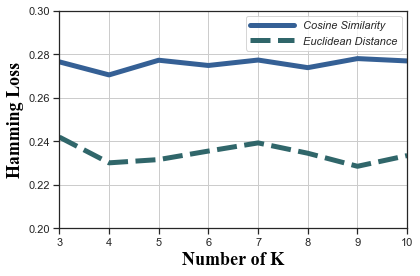

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

date_palette = [(0.20651240887022015, 0.3755393698154809, 0.5856904756194529),
 (0.18673086084284554, 0.40157226483269637, 0.4175589767109701)]

df_opt_comparison = pd.read_excel('D://Hamming Loss.xlsx')

sns.set(style='ticks')
sns.set_context(rc={'lines.linewidth':5})

plt.xlim((3,10))
plt.ylim((0.20,0.30))
plt.xticks(np.arange(3, 11, 1))
plt.yticks(np.arange(0.20,0.31,0.02))

# palette = sns.diverging_palette(250, 199, l=40, n=4, center="dark")
ax = sns.lineplot(x="K", y="Hamming Loss", hue = 'Metric', 
                  data=df_opt_comparison, 
                  markers = False,palette = date_palette, style = 'Metric')
plt.xlabel('Number of K', fontdict={'color': 'black',
                             'family': 'Times New Roman','size': 18})
plt.ylabel('Hamming Loss', fontdict={'color': 'black',
                          'family': 'Times New Roman',
                          'size': 18})
plt.legend(['Cosine Similarity','Euclidean Distance'],prop={'style': 'italic'},handlelength=4)#图例
plt.grid(True)
plt.tight_layout()

plt.savefig('D://学习//集思项目//final project//Hamming Loss.jpg',dpi=600)
plt.savefig('D://学习//集思项目//final project//Hamming Loss.eps',dpi=600)
plt.savefig('D://学习//集思项目//final project//Hamming Loss.pdf',dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


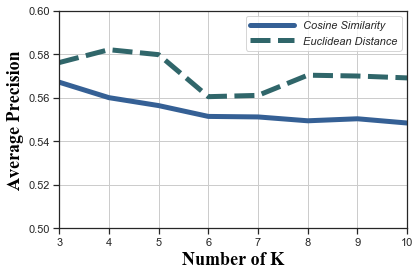

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

date_palette = [(0.20651240887022015, 0.3755393698154809, 0.5856904756194529),
 (0.18673086084284554, 0.40157226483269637, 0.4175589767109701)]

df_opt_comparison = pd.read_excel('D://Average Precision.xlsx')

sns.set(style='ticks')
sns.set_context(rc={'lines.linewidth':5})

plt.xlim((3,10))
plt.ylim((0.50,0.60))
plt.xticks(np.arange(3, 11, 1))
plt.yticks(np.arange(0.50,0.61,0.02))

# palette = sns.diverging_palette(250, 199, l=40, n=4, center="dark")
ax = sns.lineplot(x="K", y="Average Precision", hue = 'Metric', 
                  data=df_opt_comparison, 
                  markers = False,palette = date_palette, style = 'Metric')
plt.xlabel('Number of K', fontdict={'color': 'black',
                             'family': 'Times New Roman','size': 18})
plt.ylabel('Average Precision', fontdict={'color': 'black',
                          'family': 'Times New Roman',
                          'size': 18})
plt.legend(['Cosine Similarity','Euclidean Distance'],prop={'style': 'italic'},handlelength=4)#图例
plt.grid(True)
plt.tight_layout()

plt.savefig('D://学习//集思项目//final project//Average Precision.jpg',dpi=600)
plt.savefig('D://学习//集思项目//final project//Average Precision.eps',dpi=600)
plt.savefig('D://学习//集思项目//final project//Average Precision.pdf',dpi=600)